# Minería de datos

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Práctica Final Minería de Datos</h2>

## Docentes

 - José Francisco Diez Pastor
 
## Estudiantes

- Rodrigo Pascual García
- Roberto Martínez - Guisasola Guerrero

## Descripción de la práctica

Tenemos un conjunto de datos de pacientes que han acudido a una consulta de un Servicio de Cardiología. En total son más de 69.000 pacientes y para cada uno de ellos tenemos 12 atributos. Estos datos han sido extraidos de <a href = "https://www.kaggle.com/datasets/bhadaneeraj/cardio-vascular-disease-detection?select=cardio_train.csv">Kaggle</a>.<br>
Se desea predecir si el paciente tiene una enfermedad cardíaca o no.

### Descripción de los atributos
Los atributos del conjuto de datos son:
- Edad: valor objetivo que indica los días de vida del paciente. Es un valor numérico
- Altura: altura del paciente medida en centímetros. Es un valor numérico
- Peso: peso del paciente medido en kilogramos. Es un valor numérico
- Sexo: sexo del paciente. Es un atributo binario. 1: Hombre, 2: Mujer
- PSis: presión sistólica del paciente medida en la consulta durante la exploración médica. Es un valor numérico expresado en mmHg
- PDia: presión diastólica del paciente medida en la consulta durante la exploración médica. Es un valor numérico expresado en mmHg
- Colesterol: indica el estado de los niveles de colesterol obtenidos en un análisis sanguíneo. Es un atributo categórico. 1:Normal, 2: Alto, 3: Muy alto
- Glucosa: indica el estado de los niveles de glucosa obtenidos mediante una prueba de glucosa en sangre. Es un atributo categórico. 1:Normal, 2: Alto, 3: Muy alto
- Fumador: atributo que indica si el paciente fuma o no. Es un atributo binario. 0: No, 1: Sí
- Alcohol: atributo que indica si el paciente consume alcohol de manera abundante. Es un atributo binario. 0: No, 1: Sí
- Act_fisica: atributo que indica si el paciente realiza actividad física de manera regular. Es un atributo binario. 0: No, 1: Sí

#### La clase
- Cardio: presencia o ausencia de enfermedad cardiovascular. Es la variable que se quiere predecir. Es un atributo binario. 

<a id="index"></a>
## Tareas realizadas

1. [Carga y visualización de los datos](#1)
2. [Combinar los DataFrames en uno solo **(1 Puntos)**](#2)
3. [Calculo de atributos derivados **(1.5 Puntos)**](#3)
4. [Crea una función que devuelve estadísticas básicas **(2 Puntos)**](#4)
5. [Elimina los valores desconocidos **(1 Puntos)**](#5)
6. [Gráficas básicas **(1.5 Puntos)**](#6)
7. [Gráficas básicas 2 **(2.5 Puntos)**](#7)

### Carga y visualización de los datos <a id="1"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Es la primera etapa. Vamos a cargar el conjunto de datos disponible en el fichero local `cardio_train.csv` y, puesto que se encuentra en inglés, vamos a poner el nombre de las columnas en castellano. Para ello hemos empleado la función `load_data` <br>
También hemos creado nuestra propia función `mostrar_cabecera`, que muestra la cabecera del conjunto de datos y tantas filas como se le indique

In [1]:
import pandas as pd
import os
import numpy as np

def load_data(url):
    """
    Función que recibe una url (direccion del equipo con los datos en formato csv) y devuelve un Dataframe con los datos. Las cabeceras de las columnas
    son eliminadas y se ponen en castellano automáticamente al ser importadas

    Parámetros:
    ----------    
        url : string
            Dirección del fichero a cargar. No tiene ningún valor por defecto.

    Return:
    ----------    
        DataFrame (df): devuelve un DataFrame con los datos del fichero proporcionado.
    """
    dataframe = pd.read_csv(url, sep = ';')
    columnas = list(dataframe.columns.values)
    print(f"El conjunto de datos se ha importado. Las columnas originales ({columnas}) se encuentran en inglés. Las columnas van a ser traducidas al castellano")
    columnasNuevas = ['Id', 'Edad', 'Sexo', 'Altura', 'Peso', 'PSis', 'PDia', 'Colesterol', 'Glucosa', 'Fumador', 'Alcohol', 'Act_fisica', 'Cardio']
    dataframe.columns = columnasNuevas
    print(f"Columnas traducidas al castellano. Columnas actuales: {columnasNuevas}")
    procesado = False  
    return dataframe, procesado

def mostrar_cabecera(df, n):
    """
    Recibe un DataFrame de los datos y devuelve un DataFrame formado por las n primeras columnas.

    Parámetros:
    ----------    
        df : DataFrame
            DataFrame del cual se quieren mostrar las 10 primeras filas. No tiene ningún valor por defecto.
        
        n : int
            Número de filas del Da
            taFrame que se quieren mostrar.

    Return:
    ----------    
        Muestra las n primeras filas del DataFrame proporcionado.

    """
    print(f"A continuación, se muestran las {n} primeras filas del conjunto de datos")
    display(df.head(n=n))

url = "."+os.sep+"data"+os.sep+"cardio_train.csv"
df, procesado = load_data(url)
mostrar_cabecera(df, 10)

El conjunto de datos se ha importado. Las columnas originales (['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']) se encuentran en inglés. Las columnas van a ser traducidas al castellano
Columnas traducidas al castellano. Columnas actuales: ['Id', 'Edad', 'Sexo', 'Altura', 'Peso', 'PSis', 'PDia', 'Colesterol', 'Glucosa', 'Fumador', 'Alcohol', 'Act_fisica', 'Cardio']
A continuación, se muestran las 10 primeras filas del conjunto de datos


,Id,Edad,Sexo,Altura,Peso,PSis,PDia,Colesterol,Glucosa,Fumador,Alcohol,Act_fisica,Cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


### Limieza de datos
Para poder obtener la mejor solución y que el programa sea capaz de diagnosticar con la mayor precisión, es necesario que dispongamos de datos precisos. Hay ciertos valores que pueden ser erróneos o que estén mal introducidos debido a un error humano <br>
Para realizar esta limpieza de los datos hemos usado la función `limpieza_datos`, que realiza las siguientes acciones:

- Id: borramos la columna
- Edad: pasaremos de dias a años	
- Altura: borraremos esta columna, ya que se reflejará en el IMC
- Peso:	borraremos esta columna, ya que se reflejará en el IMC
- PSis: haremos nulos los valores que no sean posibles	
- PDia: haremos nulos los valores que no sean posibles

Para evitar errores en el programa, si el DataFrame ya había sido procesado, de manera que hay columnas que ya no existen, la función no realiza las anteriores acciones y muestra la frase `El DataFrame ya ha sido procesado`

In [2]:
def limpieza_datos(df, procesado):
    '''
    Función que recibe un DataFrame y devuelve un Dataframe con el IMC calculado y las columnas referentes al peso y a la altura eliminadas.

    Parámetros:
    ----------    
        df : DataFrame
            DataFrame del cual se quieren procesar los datos y calcular el IMC de los pacientes. No tiene ningún valor por defecto.

    Return:
    ----------    
        DataFrame (df): devuelve un DataFrame con los datos calculados y las columnas referentes al peso y a la altura eliminadas

    '''
    if not procesado:
        #Edad: pasaremos de dias a años
        df['EDAD'] = (df.Edad/365)
        df.drop(['Edad'], axis=1, inplace = True)
        
        #Altura y peso: usaremos este dato para calcular el Indice de masa corporal y lo borraremos
        df['BMI'] = (df.Peso/((df.Altura/100)**2))
        df.drop(['Altura', 'Peso'], axis=1, inplace = True)
        
        #Id: Borrado
        df.drop(['Id'], axis=1, inplace = True)
        
        #Correción valores de presón
        df.loc[~df['PSis'].between(60, 150), 'PSis'] = np.nan
        df.loc[~df['PDia'].between(30, 110), 'PDia'] = np.nan
        
        #correción valores de BMI
        df.loc[~df['BMI'].between(10, 50), 'BMI'] = np.nan
        
        df = df[['EDAD', 'Sexo', 'BMI', 'PSis', 'PDia', 'Colesterol', 'Glucosa', 'Fumador', 'Alcohol', 'Act_fisica','Cardio']]
        columnasNuevas = ['Edad', 'Sexo', 'IMC', 'PSis','PDia','Colesterol','Glucosa','Fumador','Alcohol', 'Act_fisica','Cardio']
        df.columns = columnasNuevas

        procesado = True
    else:
        print("El DataFrame ya ha sido procesado")
    
    return round(df,2), procesado

df, procesado = limpieza_datos(df, procesado)
mostrar_cabecera(df, 7)

A continuación, se muestran las 7 primeras filas del conjunto de datos


,Edad,Sexo,IMC,PSis,PDia,Colesterol,Glucosa,Fumador,Alcohol,Act_fisica,Cardio
0,61.56,1,28.72,130.0,80.0,2,2,0,0,1,0
1,40.13,1,26.72,110.0,70.0,1,1,0,0,1,1
2,60.00,1,25.71,120.0,80.0,1,1,0,0,1,0
3,39.86,2,31.22,120.0,80.0,1,1,1,1,1,0
4,64.09,1,25.81,120.0,80.0,1,1,0,0,1,0
5,57.93,1,22.68,100.0,70.0,1,1,0,0,1,0
6,49.55,1,27.43,100.0,70.0,1,1,0,0,1,0


### Información sobre las columnas y calcular estadísticas
Es importante conocer la información que hay en cada columna, así como sus estadísticas. Para ello, hemos creado una función llamada `informacionColumnas`, que proporciona información acerca del número de filas y columnas del DataFrame. Esta función también muestra el número de ejemplos que hay en cada uno de los posibles valores de un listado de columnas proporcionado, gracias a la función `datosColumna`. Por defecto, muestra la información de la columna `Cardio`<br>

Una vez conocidos los valores de las columnas deseadas, mostramos las estadisticas de cada columna del DataFrame con la función `mostrarEstadisticas`. Esta función recibe el DataFrame y un listado de estadísticas que se quieren mostrar. También indica el número de valores nulos que hay en una columna. Todos estos valores son redondeados con dos decimales 

In [3]:
def informacionColumnas(df, lColumnas = ["Cardio"]):
    """
    Recibe el DataFrame de los datos y un listado de columnas y muestra el número de filas y columnas y cuantos ejemplos hay en cada una de las clases de cada columna.
    
    Parámetros:
    ----------    
        df : DataFrame
            DataFrame del cual se quiere conocer la información. No tiene ningún valor por defecto.

        class_name : list
            Listado de columnas de las cuales se quiere obtener sus estadísticas

    Return:
    ----------    
        Muestra el número de filas y columnas del DataFrame proporcionado.\n
        Además, indica el número de ejemplos que pertenecen a cada valor de cada columna, en diferentes líneas.
    """
        
    filas = len(df.index)
    columnas = len(df.columns)
    datos = f"El dataset está formado por {filas} filas y {columnas} columnas. \nA continuación, se muestran unas estadísticas de cada columna empleada:\n"
    for i in lColumnas:
        datos = datos + datosColumna(df, i)
    print(datos)
    

def datosColumna(df,columna):
    """
    Recibe el DataFrame de los datos y el nombre de una columna y devuelve un string con el número de ejemplos que hay en cada uno de los posibles 
    valores de la columna y algunos valores estadísticos
    
    Parámetros:
    ----------    
        df : DataFrame
            DataFrame del cual se quiere conocer la información. No tiene ningún valor por defecto.

        columna : string
            Nombre de la columna de la cual se quiere conocer cuántos ejemplos pertenecen a cada clase. No tiene ningún valor por defecto.

    Return:
    ----------    
        String (estadisticas): string con las estadisticas de cada columna.\n
    """
    estadisticas = f"En la columna {columna} hay "
    media = 0 
    ejemplos = df.groupby(columna).size()
    for i in ejemplos.index:
        estadisticas = estadisticas  + str(ejemplos[i]) + " ejemplos de la clase " + str(i) + ", "
        media = media + (i*ejemplos[i])/len(df.index)
    estadisticas = estadisticas + "tiene un valor medio de " + str(media) + "\n"
    return estadisticas 



In [4]:
def mostrarEstadisticas(df, valores):
    """
    Muestra estadísticas básicas de un DataFrame.
    
    Argumentos:
    - df: DataFrame de pandas.
    """
    estadisticas = df.describe()
    estadisticas = estadisticas.transpose()
    df_stats = estadisticas[valores]
    nulos = (df.isna()).sum()
    df_stats['Nº nulos']=nulos
    return round(df_stats,2)
    

In [5]:
columnas = ["Cardio", "Glucosa"]
informacionColumnas(df, columnas)
valoresEstadisticas = ['count', 'mean', 'std', 'min', 'max']
mostrarEstadisticas(df, valoresEstadisticas)

El dataset está formado por 69301 filas y 11 columnas. 
A continuación, se muestran unas estadísticas de cada columna empleada:
En la columna Cardio hay 34679 ejemplos de la clase 0, 34622 ejemplos de la clase 1, tiene un valor medio de 0.4995887505230805
En la columna Glucosa hay 58885 ejemplos de la clase 1, 5139 ejemplos de la clase 2, 5277 ejemplos de la clase 3, tiene un valor medio de 1.2264469488174774



C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15916\3123330303.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats['Nº nulos']=nulos


,count,mean,std,min,max,Nº nulos
Edad,69301.0,53.34,6.76,29.58,64.97,0
Sexo,69301.0,1.35,0.48,1.00,2.00,0
IMC,69057.0,27.41,5.06,10.73,50.00,244
PSis,64055.0,123.88,13.09,60.00,150.00,5246
PDia,67978.0,81.16,9.14,30.00,110.00,1323
Colesterol,69301.0,1.37,0.68,1.00,3.00,0
Glucosa,69301.0,1.23,0.57,1.00,3.00,0
Fumador,69301.0,0.09,0.28,0.00,1.00,0
Alcohol,69301.0,0.05,0.23,0.00,1.00,0
Act_fisica,69301.0,0.80,0.40,0.00,1.00,0


### Tratamiento de valores missing <a id="4"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Los valores desconocidos son un problema a la hora de emplear algoritmos de clasificación, por ello vamos a sustituirlos por la media. De esta forma, el valor medio de cada columna no se verá afectado y se evitará que la toma de decisiones por parte del algoritmo sí que se modifique. Para reemplazar los valores missing hemos empleado la función `eliminarMissings`

In [6]:
def eliminarMissings(df):
    if (df.isna()).sum().sum() != 0:
        #Recorremos los nombres de las columnas del dataframe
        for i in df.columns:
        #Para cada columna rellenamos los valores Na con la media de la columna
            df[i].fillna(df[i].mean(skipna = True), inplace=True)
    return df

display(mostrarEstadisticas(df, valoresEstadisticas))
df = eliminarMissings(df)
mostrar_cabecera(df, 18)
display(mostrarEstadisticas(df, valoresEstadisticas))


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15916\3123330303.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats['Nº nulos']=nulos


,count,mean,std,min,max,Nº nulos
Edad,69301.0,53.34,6.76,29.58,64.97,0
Sexo,69301.0,1.35,0.48,1.00,2.00,0
IMC,69057.0,27.41,5.06,10.73,50.00,244
PSis,64055.0,123.88,13.09,60.00,150.00,5246
PDia,67978.0,81.16,9.14,30.00,110.00,1323
Colesterol,69301.0,1.37,0.68,1.00,3.00,0
Glucosa,69301.0,1.23,0.57,1.00,3.00,0
Fumador,69301.0,0.09,0.28,0.00,1.00,0
Alcohol,69301.0,0.05,0.23,0.00,1.00,0
Act_fisica,69301.0,0.80,0.40,0.00,1.00,0


A continuación, se muestran las 18 primeras filas del conjunto de datos


,Edad,Sexo,IMC,PSis,PDia,Colesterol,Glucosa,Fumador,Alcohol,Act_fisica,Cardio
0,61.56,1,28.72,130.000000,80.0,2,2,0,0,1,0
1,40.13,1,26.72,110.000000,70.0,1,1,0,0,1,1
2,60.00,1,25.71,120.000000,80.0,1,1,0,0,1,0
3,39.86,2,31.22,120.000000,80.0,1,1,1,1,1,0
4,64.09,1,25.81,120.000000,80.0,1,1,0,0,1,0
5,57.93,1,22.68,100.000000,70.0,1,1,0,0,1,0
6,49.55,1,27.43,100.000000,70.0,1,1,0,0,1,0
7,61.77,1,35.88,140.000000,90.0,2,1,0,0,1,1
8,58.22,1,27.59,110.000000,80.0,1,1,0,0,1,0
9,61.50,1,26.04,140.000000,90.0,3,1,0,0,1,1


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15916\3123330303.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats['Nº nulos']=nulos


,count,mean,std,min,max,Nº nulos
Edad,69301.0,53.34,6.76,29.58,64.97,0
Sexo,69301.0,1.35,0.48,1.00,2.00,0
IMC,69301.0,27.41,5.06,10.73,50.00,0
PSis,69301.0,123.88,12.59,60.00,150.00,0
PDia,69301.0,81.16,9.06,30.00,110.00,0
Colesterol,69301.0,1.37,0.68,1.00,3.00,0
Glucosa,69301.0,1.23,0.57,1.00,3.00,0
Fumador,69301.0,0.09,0.28,0.00,1.00,0
Alcohol,69301.0,0.05,0.23,0.00,1.00,0
Act_fisica,69301.0,0.80,0.40,0.00,1.00,0


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15916\1059769152.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["IMC"], color="blue")


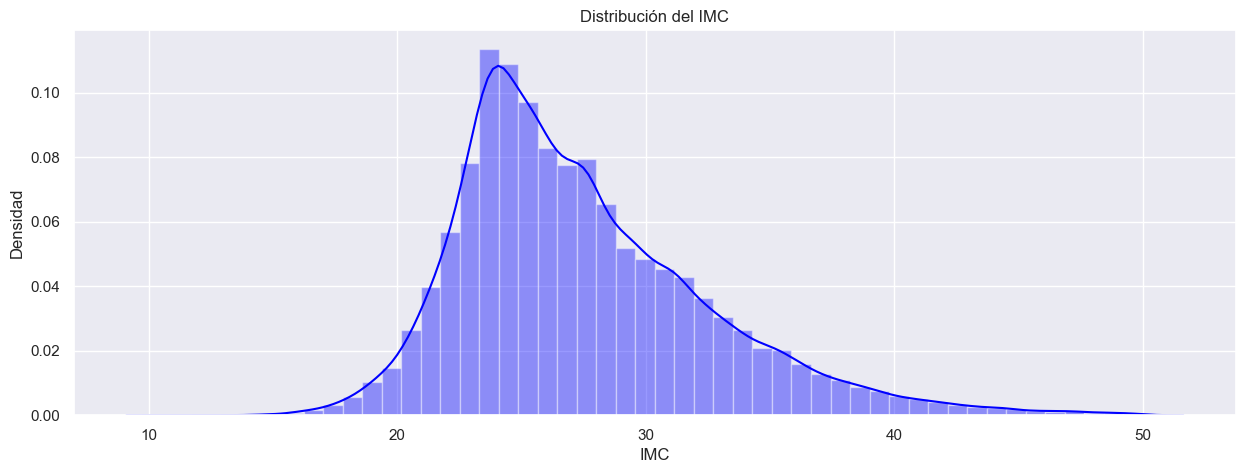

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(color_codes=True)

plt.figure(figsize=(15,5))
sns.distplot(df["IMC"], color="blue")
plt.title("Distribución del IMC")
plt.ylabel("Densidad")
plt.xlabel("IMC")

#Guardamos el gráfico en memoria, por si fuera necesario emplear el análisis estadístico de estos datos por parte de los médicos
plt.savefig("Distribución del IMC.jpg", bbox_inches='tight')